In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests as re

In [2]:
base_url = r"https://mobilednajournal.biomedcentral.com/articles"

In [3]:
year_dict = dict(enumerate([x for x in range(1,14)],start=2010))

In [4]:
query = str(input("Enter topic: "))
year = int(input("Enter year: "))
year = str(year_dict.get(year))

Enter topic: DNA
Enter year: 2013


In [5]:
params = {'query':query,'volume':year,'searchType':'','tab':'keyword'}

In [6]:
content = re.get(base_url,params)

In [7]:
base_body = content.text
base_soup = BeautifulSoup(base_body, 'html.parser')

In [28]:
title_ls = list()
titles = base_soup.find_all("h3", class_ = "c-listing__title")
for i in titles:
    title_ls.append(i.text.strip())

In [9]:
content_year = re.get(base_url, params)

In [10]:
year_body = content_year.text
year_soup = BeautifulSoup(year_body, 'html.parser')

In [11]:
ahref_ls = list()
ahrefs = year_soup.find_all("a", itemprop = 'url')
for i in ahrefs[1:]:
    ahref_ls.append(base_url.replace("/articles",'') + i['href'])

In [32]:
author_major= list()
for i in ahref_ls:
    author_minor = list()
    temp = BeautifulSoup(re.get(i).text, 'html.parser')
    authors = temp.find_all("a", attrs= {"data-test": "author-name"})
    for i in authors:
        author_minor.append(i.text)
    author_major.append(','.join(author_minor))

In [33]:
df = pd.DataFrame({
    'titles': title_ls,
    'author': author_major
})

In [34]:
df.to_csv(r"C:\Users\joses\source\repos\Mobile_DNA_BS4_WebScrape\Data.txt", sep=';')

In [12]:
import matplotlib.pyplot as plt

In [18]:
access_counts = list()
for i in ahref_ls:
    temp = BeautifulSoup(re.get(i).text, 'html.parser')
    access = temp.find("ul", attrs= {"class": "c-article-metrics-bar u-list-reset"}) \
    .find("li", attrs={"class": "c-article-metrics-bar__item"}) \
    .find_all("p", attrs={"class": "c-article-metrics-bar__count"})[0].text \
    .split()[0] \
    .replace("k", "000")
    access_counts.append(int(access))

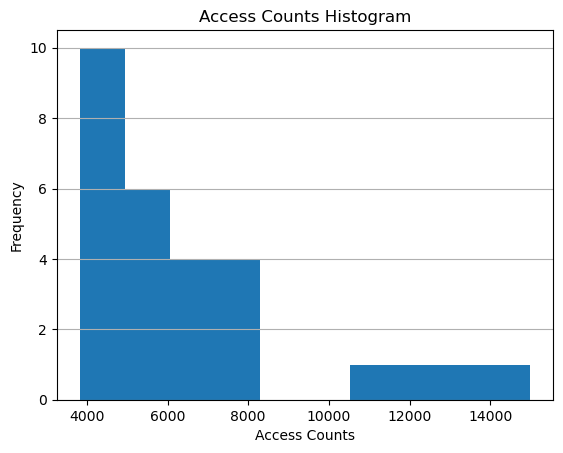

In [26]:
ax = plt.subplot()
ax.hist(access_counts)
ax.grid()
ax.xaxis.grid(False)
ax.set_xlabel("Access Counts")
ax.set_ylabel("Frequency")
ax.set_title("Access Counts Histogram")
plt.show()